In [1]:
! pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
movies=pd.read_csv('D:\\Data Science\\Assignments\\Assignment 9 (Associaton Rules)\\my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df=pd.get_dummies(movies)
df.head(10)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Apriori Algorithm

In [5]:
frequent_itemsets=apriori(df, min_support=0.4,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Glad..."
59,0.4,"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Six..."
60,0.4,"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Six..."
61,0.4,"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Gla..."


In [6]:
rules=association_rules(frequent_itemsets, metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(V2_Patriot, V1_Gladiator, Sixth Sense, Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(V1_Gladiator),"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Sixth Sense),"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Gladiator),"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [7]:
rules.sort_values('lift',ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
497,"(Sixth Sense, V2_Patriot)","(Patriot, V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
255,"(Patriot, V3_Sixth Sense)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
423,"(Sixth Sense, V2_Patriot, Gladiator, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
555,"(Sixth Sense, V2_Patriot, Gladiator, Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
426,"(V2_Patriot, Gladiator, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
428,"(Sixth Sense, V2_Patriot, Gladiator)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
429,"(Sixth Sense, V2_Patriot, Patriot)","(Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
250,"(Sixth Sense, Patriot, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
434,"(Sixth Sense, Gladiator, Patriot)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
435,"(V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

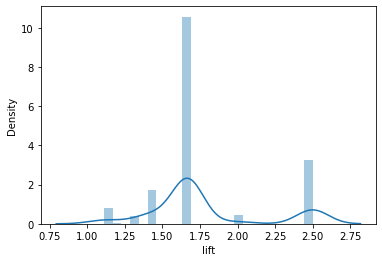

In [9]:
sns.distplot(rules['lift'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='leverage', ylabel='Density'>

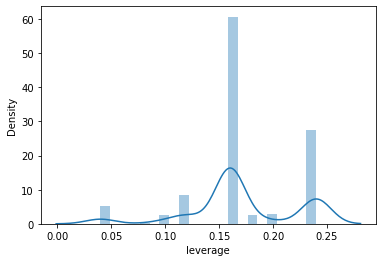

In [10]:
sns.distplot(rules['leverage'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='confidence', ylabel='Density'>

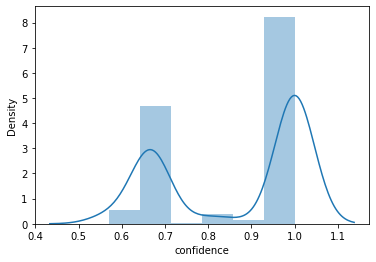

In [11]:
sns.distplot(rules['confidence'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='support', ylabel='Density'>

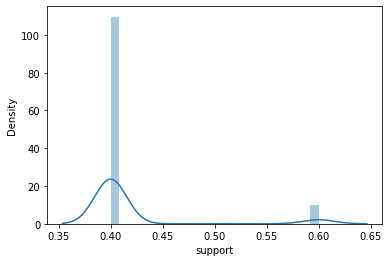

In [12]:
sns.distplot(rules['support'])